<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/images/IDSN-logo.png" width="300" alt="cognitiveclass.ai logo">

<h1 align="center"><font size="5">TENSORFLOW'S HELLO WORLD</font></h1>


Estimated time needed: <b>15</b> minutes

<h3>Objective for this Notebook<h3>    
<h5> 1. How does TensorFlow work?</h5>
<h5> 2. Building a Graph. </h5>
<h5> 3. Meaning of Tensor? </h5>
<h5> 4. Defining multidimensional arrays using TensorFlow. </h5>
<h5> 5. How TensorFlow handles Variables. </h5>
<h5> 6. What are these Placeholders and what do they do? </h5>
<h5> 7. Learn Operations using TensorFlow. </h5>     



<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>In this notebook we will overview the basics of TensorFlow, learn it's structure and see what is the motivation to use it</strong></font>
<br>
<h2>Table of Contents</h2>
<ol>
    <li><a href="#ref2">How does TensorFlow work?</a></li>
    <li><a href="#ref3">tf.function and AutoGraph</a></li>
    <li><a href="#ref4">Defining multidimensional arrays using TensorFlow</a></li>
    <li><a href="#ref5">Why Tensors?</a></li>
    <li><a href="#ref6">Variables</a></li>
    <li><a href="#ref7">Operations</a></li>
</ol>
<p></p>
</div>
<br>

<hr>


<a id="ref2"></a>

<h2>How does TensorFlow work?</h2>

TensorFlow defines computations as Graphs, and these are made with operations (also know as “ops”). So, when we work with TensorFlow, it is the same as defining a series of operations in a Graph.

For example, the image below represents a graph in TensorFlow. _W_, _x_ and _b_ are tensors over the edges of this graph. _MatMul_ is an operation over the tensors _W_ and _b_, after that _Add_ is called and add the result of the previous operator with _b_. The resultant tensors of each operation cross the next one until the end where it's possible to get the wanted result.


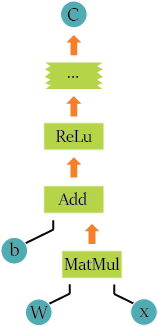

With TensorFlow 2.x, **Eager Execution** is enabled by default. This allows TensorFlow code to be executed and evaluated line by line. Before version 2.x was released, every graph had to be run wihthin a TensorFlow session. This only allowed for the entire graph to be run all at once. This would make debugging the computation graph each time more difficult.


<h2>Installing TensorFlow </h2>

We begin by installing TensorFlow version 2.9.0 and its required prerequistes. 


In [33]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.9.0

**Restart kernel for latest version of TensorFlow to be activated, then continue to the next section.**


<h2>Importing TensorFlow</h2>
<p>To use TensorFlow, we need to import the library. We imported it and optionally gave it the name "tf", so the modules can be accessed by <b>tf.module-name</b>:</p>


In [34]:
import tensorflow as tf
if not tf.__version__ == '2.9.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.9.0, or restart your Kernel (Kernel->Restart & Clear Output)')

IMPORTANT! => Please restart the kernel by clicking on "Kernel" -> "Restart and Clear Outout" and wait until all output disapears. Then your changes will be picked up.

After you have restarted the kernel, re-run the previous cell to import tensorflow and then continue to the next section.


* * *


<a id="ref3"></a>

# tf.function and AutoGraph


Now we call the TensorFlow functions that construct new <b>tf.Operation</b> and <b>tf.Tensor</b> objects. As mentioned, each <b>tf.Operation</b> is a <b>node</b> and each <b>tf.Tensor</b> is an edge in the graph.

Lets add 2 constants to our graph. For example, calling tf.constant([2], name = 'constant_a') adds a single <b>tf.Operation</b> to the default graph. This operation produces the value 2, and returns a <b>tf.Tensor</b> that represents the value of the constant.  
<b>Notice:</b> tf.constant([2], name="constant_a") creates a new tf.Operation named "constant_a" and returns a tf.Tensor named "constant_a:0".


In [35]:
a = tf.constant([2], name = 'constant_a')
b = tf.constant([3], name = 'constant_b')

Lets look at the tensor **a**.


In [36]:
a 

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([2], dtype=int32)>

As you can see, it just shows the name, shape and type of the tensor in the graph. We will see it's value by running the TensorFlow code as shown below.


In [37]:
tf.print(a.numpy()[0])

2


Annotating the python functions with **tf.function** uses TensorFlow Autograph to create a TensorFlow static execution graph for the function.   tf.function annotation tells TensorFlow Autograph to transform function _add_ into TensorFlow control flow, which then defines the TensorFlow static execution graph. 


In [38]:
@tf.function
def add(a,b):
    c = tf.add(a, b)
    #c = a + b is also a way to define the sum of the terms
    print(c)
    return c


In [39]:
result = add(a,b)
tf.print(result[0])

Tensor("Add:0", shape=(1,), dtype=int32)
5


Even this silly example of adding 2 constants to reach a simple result defines the basis of TensorFlow. Define your operations (In this case our constants and _tf.add_), define a Python function named _add_ and decorate it with using the _tf.function_ annotator.


<h3>What is the meaning of Tensor?</h3>

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>In TensorFlow all data is passed between operations in a computation graph, and these are passed in the form of Tensors, hence the name of TensorFlow.</strong></font>
<br>
<br>
    The word <b>tensor</b> from new latin means "that which stretches". It is a mathematical object that is named "tensor" because an early application of tensors was the study of materials stretching under tension. The contemporary meaning of tensors can be taken as multidimensional arrays. 

</div>

That's great, but... what are these multidimensional arrays? 

Going back a little bit to physics to understand the concept of dimensions:<br>

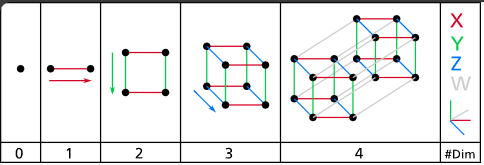

<div style="text-align:center"><a href="https://en.wikipedia.org/wiki/Dimension?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Image Source</a></div>
<br>

The zero dimension can be seen as a point, a single object or a single item.

The first dimension can be seen as a line, a one-dimensional array can be seen as numbers along this line, or as points along the line. One dimension can contain infinite zero dimension/points elements.

The second dimension can be seen as a surface, a two-dimensional array can be seen as an infinite series of lines along an infinite line. 

The third dimension can be seen as volume, a three-dimensional array can be seen as an infinite series of surfaces along an infinite line.

The Fourth dimension can be seen as the hyperspace or spacetime, a volume varying through time, or an infinite series of volumes along an infinite line. And so forth on...


As mathematical objects: <br><br>
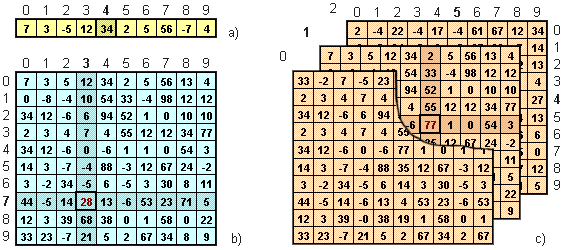

<div style="text-align: center"><a href="https://book.mql4.com/variables/arrays?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Image Source</a></div>


Summarizing:<br><br>

<table style="width:100%">
  <tr>
    <td><b>Dimension</b></td>
    <td><b>Physical Representation</b></td> 
    <td><b>Mathematical Object</b></td>
    <td><b>In Code</b></td>
  </tr>
  
  <tr>
    <td>Zero </td>
    <td>Point</td> 
    <td>Scalar (Single Number)</td>
    <td>[ 1 ]</td>
  </tr>

  <tr>
    <td>One</td>
    <td>Line</td> 
    <td>Vector (Series of Numbers) </td>
    <td>[ 1,2,3,4,... ]</td>
  </tr>
  
   <tr>
    <td>Two</td>
    <td>Surface</td> 
    <td>Matrix (Table of Numbers)</td>
       <td>[ [1,2,3,4,...], [1,2,3,4,...], [1,2,3,4,...],... ]</td>
  </tr>
  
   <tr>
    <td>Three</td>
    <td>Volume</td> 
    <td>Tensor (Cube of Numbers)</td>
    <td>[ [[1,2,...], [1,2,...], [1,2,...],...], [[1,2,...], [1,2,...], [1,2,...],...], [[1,2,...], [1,2,...], [1,2,...] ,...]... ]</td>
  </tr>
  
</table>


* * *


<a id="ref4"></a>

<h2>Defining multidimensional arrays using TensorFlow</h2>
Now we will try to define such arrays using TensorFlow:


In [40]:

Scalar = tf.constant(2)
Vector = tf.constant([5,6,2])
Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Tensor = tf.constant( [ [[1,2,3],[2,3,4],[3,4,5]] , [[4,5,6],[5,6,7],[6,7,8]] , [[7,8,9],[8,9,10],[9,10,11]] ] )

print ("Scalar (1 entry):\n %s \n" % Scalar)

print ("Vector (3 entries) :\n %s \n" % Vector)

print ("Matrix (3x3 entries):\n %s \n" % Matrix)

print ("Tensor (3x3x3 entries) :\n %s \n" % Tensor)

Scalar (1 entry):
 tf.Tensor(2, shape=(), dtype=int32) 

Vector (3 entries) :
 tf.Tensor([5 6 2], shape=(3,), dtype=int32) 

Matrix (3x3 entries):
 tf.Tensor(
[[1 2 3]
 [2 3 4]
 [3 4 5]], shape=(3, 3), dtype=int32) 

Tensor (3x3x3 entries) :
 tf.Tensor(
[[[ 1  2  3]
  [ 2  3  4]
  [ 3  4  5]]

 [[ 4  5  6]
  [ 5  6  7]
  [ 6  7  8]]

 [[ 7  8  9]
  [ 8  9 10]
  [ 9 10 11]]], shape=(3, 3, 3), dtype=int32) 



<b>tf.shape</b> returns the shape of our data structure.


In [41]:
Scalar.shape

TensorShape([])

In [42]:
Tensor.shape

TensorShape([3, 3, 3])

Now that you understand these data structures, I encourage you to play with them using some previous functions to see how they will behave, according to their structure types:


In [43]:

Matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

@tf.function
def add():
    add_1_operation = tf.add(Matrix_one, Matrix_two)
    return add_1_operation



print ("Defined using tensorflow function :")
add_1_operation = add()
print(add_1_operation)
print ("Defined using normal expressions :")
add_2_operation = Matrix_one + Matrix_two
print(add_2_operation)

Defined using tensorflow function :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)
Defined using normal expressions :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)


With the regular symbol definition and also the TensorFlow function we were able to get an element-wise multiplication, also known as Hadamard product. <br>

But what if we want the regular matrix product?

We then need to use another TensorFlow function called <b>tf.matmul()<b>:


In [44]:

Matrix_one = tf.constant([[2,3],[3,4]])
Matrix_two = tf.constant([[2,3],[3,4]])

@tf.function
def mathmul():
  return tf.matmul(Matrix_one, Matrix_two)


mul_operation = mathmul()

print ("Defined using tensorflow function :")
print(mul_operation)



Defined using tensorflow function :
tf.Tensor(
[[13 18]
 [18 25]], shape=(2, 2), dtype=int32)


We could also define this multiplication ourselves, but there is a function that already does that, so no need to reinvent the wheel!


* * *


<a id="ref5"></a>

<h2>Why Tensors?</h2>

The Tensor structure helps us by giving the freedom to shape the dataset in the way we want.

And it is particularly helpful when dealing with images, due to the nature of how information in images are encoded,

Thinking about images, its easy to understand that it has a height and width, so it would make sense to represent the information contained in it with a two dimensional structure (a matrix)... until you remember that images have colors, and to add information about the colors, we need another dimension, and thats when Tensors become particularly helpful.

Images are encoded into color channels, the image data is represented into each color intensity in a color channel at a given point, the most common one being RGB, which means Red, Blue and Green. The information contained into an image is the intensity of each channel color into the width and height of the image, just like this:

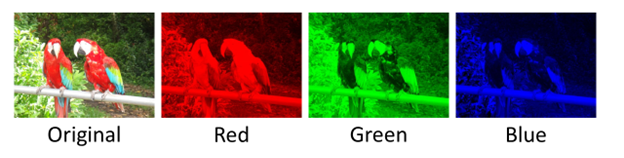
<a href="https://msdn.microsoft.com/en-us/library/windows/desktop/dn424131.aspx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Image Source</a>

So the intensity of the red channel at each point with width and height can be represented into a matrix, the same goes for the blue and green channels, so we end up having three matrices, and when these are combined they form a tensor. 


* * *


<a id="ref6"></a>

# Variables

Now that we are more familiar with the structure of data, we will take a look at how TensorFlow handles variables.
<b>First of all, having tensors, why do we need variables?</b>  
TensorFlow variables are used to share and persist some stats that are manipulated by our program. That is, when you define a variable, TensorFlow adds a <b>tf.Operation</b> to your graph. Then, this operation will store a writable tensor value. So, you can update the value of a variable through each run.


Let's first create a simple counter, by first initializing a variable _v_ that will be increased one unit at a time:


In [45]:
v = tf.Variable(0)

We now create a python method _increment_by_one_. This method will internally call _td.add_ that takes in two arguments, the <b>reference_variable</b> to update, and assign it to the <b>value_to_update</b> it by.


In [46]:
@tf.function
def increment_by_one(v):
        v = tf.add(v,1)
        return v

To update the value of the variable _v_, we simply call the _increment_by_one_ method and pass the variable to it. We will invoke this method thrice. This method will increment the variable by one and print the updated value each time. 


In [47]:
for i in range(3):
    v = increment_by_one(v)
    print(v)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


* * *


<a id="ref7"></a>

<h2>Operations</h2>

Operations are nodes that represent the mathematical operations over the tensors on a graph. These operations can be any kind of functions, like add and subtract tensor or maybe an activation function.

<b>tf.constant</b>, <b>tf.matmul</b>, <b>tf.add</b>, <b>tf.nn.sigmoid</b> are some of the operations in TensorFlow. These are like functions in python but operate directly over tensors and each one does a specific thing. 

<div class="alert alert-success alertsuccess" style="margin-top: 20px">Other operations can be easily found in: <a href="https://www.tensorflow.org/versions/r0.9/api_docs/python/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">https://www.tensorflow.org/versions/r0.9/api_docs/python/index.html</a></div>


In [48]:
a = tf.constant([5])
b = tf.constant([2])
c = tf.add(a,b)
d = tf.subtract(a,b)


print ('c =: %s' % c)
    
print ('d =: %s' % d)

c =: tf.Tensor([7], shape=(1,), dtype=int32)
d =: tf.Tensor([3], shape=(1,), dtype=int32)


<b>tf.nn.sigmoid</b> is an activation function, it's a little more complicated, but this function helps learning models to evaluate what kind of information is good or not.


* * *


## Want to learn more?

Also, you can use **Watson Studio** to run these notebooks faster with bigger datasets.**Watson Studio** is IBM’s leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, **Watson Studio** enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of **Watson Studio** users today with a free account at [Watson Studio](https://cocl.us/ML0120EN_DSX).This is the end of this lesson. Thank you for reading this notebook, and good luck on your studies.


### Thanks for completing this lesson!

Notebook created by: <a href="https://linkedin.com/in/romeo-kienzler-089b4557?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Romeo Kienzler </a>, <a href="https://linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Saeed Aghabozorgi </a> and <a href="https://ca.linkedin.com/in/rafaelblsilva?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Rafael Belo Da Silva </a>

Updated to TF 2.X by  <a href="https://www.linkedin.com/in/samaya-madhavan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Samaya Madhavan </a>


### References:



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


[https://www.tensorflow.org/versions/r0.9/get_started/index.html](https://www.tensorflow.org/versions/r0.9/get_started/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>
[http://jrmeyer.github.io/tutorial/2016/02/01/TensorFlow-Tutorial.html](http://jrmeyer.github.io/tutorial/2016/02/01/TensorFlow-Tutorial.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>
[https://www.tensorflow.org/versions/r0.9/api_docs/python/index.html](https://www.tensorflow.org/versions/r0.9/api_docs/python/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>
<a href="https://www.tensorflow.org/api_docs/python/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">https://www.tensorflow.org/versions/r0.9/resources/dims_types.html</a><br>
[https://en.wikipedia.org/wiki/Dimension](https://en.wikipedia.org/wiki/Dimension?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>
[https://book.mql4.com/variables/arrays](https://book.mql4.com/variables/arrays?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>
[https://msdn.microsoft.com/en-us/library/windows/desktop/dn424131(v=vs.85).aspx](https://msdn.microsoft.com/en-us/library/windows/desktop/dn424131\(v=vs.85\).aspx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>


<hr>

Copyright © 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
